In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
banking_data = pd.read_excel('./data/Churn-Modelling.xlsx')
banking_data.drop('RowNumber', axis=1, inplace=True)
banking_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
def proportion(df, column):
    return df[column].sum() / df[column].count()

proportion_leaving = proportion(banking_data, 'Exited')

print(f"The proportion of customers leaving: {proportion_leaving*100:.0f}%")

The proportion of customers leaving: 20%


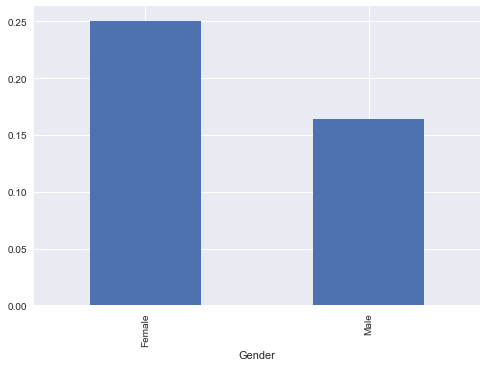

In [37]:
banking_data_gender = banking_data.groupby('Gender')
gender_proportion = proportion(banking_data_gender, 'Exited')

gender_proportion.plot.bar()

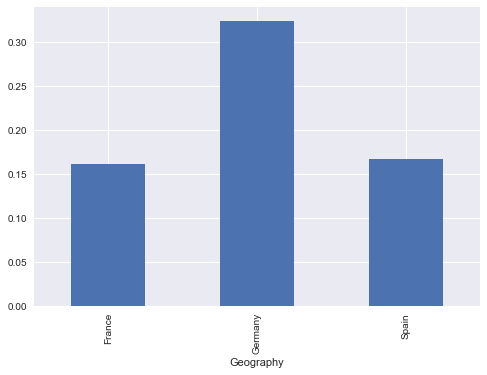

In [46]:
proportion(banking_data.groupby('Geography'), 'Exited').plot.bar()

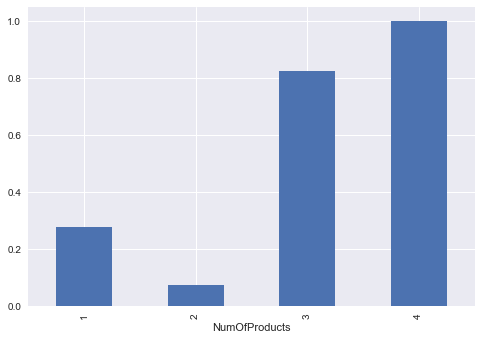

In [47]:
proportion(banking_data.groupby('NumOfProducts'), 'Exited').plot.bar()

In [39]:
banking_data['Validation'] = banking_data['CustomerId'] % 10
banking_data.drop('CustomerId', axis=1, inplace=True)
banking_data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Validation
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,4
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,4
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,8


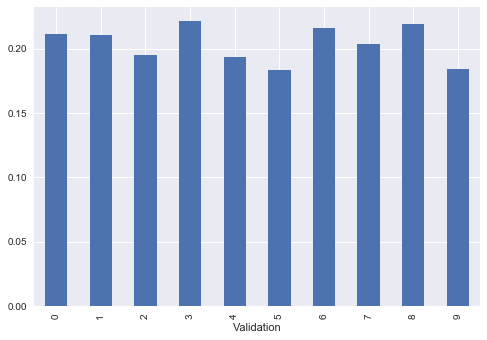

In [45]:
banking_data_validation = banking_data.groupby('Validation')
proportion(banking_data_validation, 'Exited').plot.bar()